In [1]:
from tensorflow.keras.datasets import imdb    #← 從 keras.datasets 套件中匯入 imdb
(a_train, b_train),(a_test, b_test)= imdb.load_data(num_words=10000) # 載入 IMDB

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

tok = Tokenizer(num_words=10000)           #←指定字典的總字數
x_train = tok.sequences_to_matrix(a_train) #←將訓練樣本做 k-hot 編碼
x_test  = tok.sequences_to_matrix(a_test)  #←將測試樣本做 k-hot 編碼

y_train = b_train.astype('float32')   #←將訓練標籤轉為浮點向量
y_test  = b_test.astype('float32')    #←將測試標籤轉為浮點向量

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()                       #←建立模型物件
model.add(Dense(16, activation='relu', input_dim=10000))  #←輸入層
model.add(Dense(16, activation='relu'))    #←隱藏層
model.add(Dense(1, activation='sigmoid'))  #←輸出層

In [4]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [5]:
history = model.fit(x_train, y_train,
                    batch_size=512,  #←每批次 512 筆樣本
                    epochs=10,       #←共訓練 10 週期
                    verbose = 2,     #←顯示精簡訊息 (無進度條)
                    validation_split=0.2)
                             #↑由訓練資料後面切出 20% 做為驗證用

Epoch 1/10
40/40 - 4s - loss: 0.5260 - acc: 0.7947 - val_loss: 0.3818 - val_acc: 0.8752
Epoch 2/10
40/40 - 1s - loss: 0.3057 - acc: 0.9018 - val_loss: 0.2998 - val_acc: 0.8878
Epoch 3/10
40/40 - 1s - loss: 0.2248 - acc: 0.9243 - val_loss: 0.2777 - val_acc: 0.8906
Epoch 4/10
40/40 - 1s - loss: 0.1797 - acc: 0.9388 - val_loss: 0.2994 - val_acc: 0.8840
Epoch 5/10
40/40 - 1s - loss: 0.1500 - acc: 0.9493 - val_loss: 0.2783 - val_acc: 0.8920
Epoch 6/10
40/40 - 1s - loss: 0.1271 - acc: 0.9590 - val_loss: 0.2944 - val_acc: 0.8886
Epoch 7/10
40/40 - 1s - loss: 0.1089 - acc: 0.9650 - val_loss: 0.3478 - val_acc: 0.8748
Epoch 8/10
40/40 - 1s - loss: 0.0938 - acc: 0.9707 - val_loss: 0.3347 - val_acc: 0.8860
Epoch 9/10
40/40 - 1s - loss: 0.0804 - acc: 0.9749 - val_loss: 0.3546 - val_acc: 0.8822
Epoch 10/10
40/40 - 1s - loss: 0.0667 - acc: 0.9811 - val_loss: 0.3960 - val_acc: 0.8810


In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

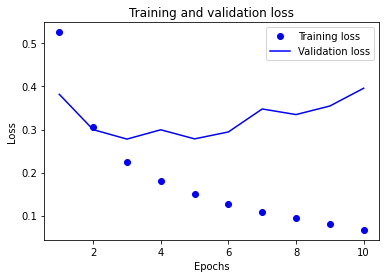

In [13]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

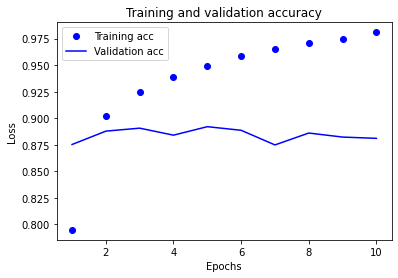

In [14]:
plt.clf()   # clear figure
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()